# Simple Example

An simple example of calculating the Transmission and Reflection spectrum of a layered strcuture
TiO2/Ag/TiO2 Sandwich structure that improve the Transmission of Ag layer

In [7]:
import numpy as np
from scipy.constants import c
from layerlumos.utils_materials import load_material, interpolate_material
from layerlumos.layerlumos import stackrt, stackrt0, stackrt_theta
import matplotlib.pyplot as plt
import numpy as np

In [14]:
TiO2_data = load_material('TiO2')
Ag_data = load_material('Ag')

# Define wavelength range (in meters)
wavelengths = np.linspace(300e-9, 900e-9, 100)  # 100 points from 300nm to 700nm
frequencies = c / wavelengths  # Convert wavelengths to frequencies

# Interpolate n and k values for TiO2 over the specified frequency range
n_k_TiO2 = interpolate_material(TiO2_data, frequencies)
n_TiO2 = n_k_TiO2[:, 0] + 1j*n_k_TiO2[:, 1]  # Combine n and k into a complex refractive index
n_k_Ag = interpolate_material(Ag_data, frequencies)
n_Ag = n_k_Ag[:, 0] + 1j*n_k_Ag[:, 1]  # Combine n and k into a complex refractive index

# Define stack configuration
n_air = np.ones_like(frequencies)  # Refractive index of air
d_air = np.array([0])
d_TiO2 = np.array([2e-8])
d_Ag = np.array([1e-8])  # Thickness of TiO2 layer in meters (e.g., 2 microns)

# Stack refractive indices and thicknesses for air-TiO2-air
n_stack = np.vstack([n_air, n_TiO2, n_Ag, n_TiO2, n_air]).T  # Transpose to match expected shape (Nlayers x Nfreq)
d_stack = np.vstack([d_air, d_TiO2, d_Ag, d_TiO2, d_air]).squeeze()  # No frequency dependence on thickness

# Calculate R and T over the frequency (wavelength) range
R_TE, T_TE, R_TM, T_TM = stackrt_theta(n_stack, d_stack, frequencies)

# Calculate average R and T
R_avg = (R_TE + R_TM) / 2
T_avg = (T_TE + T_TM) / 2


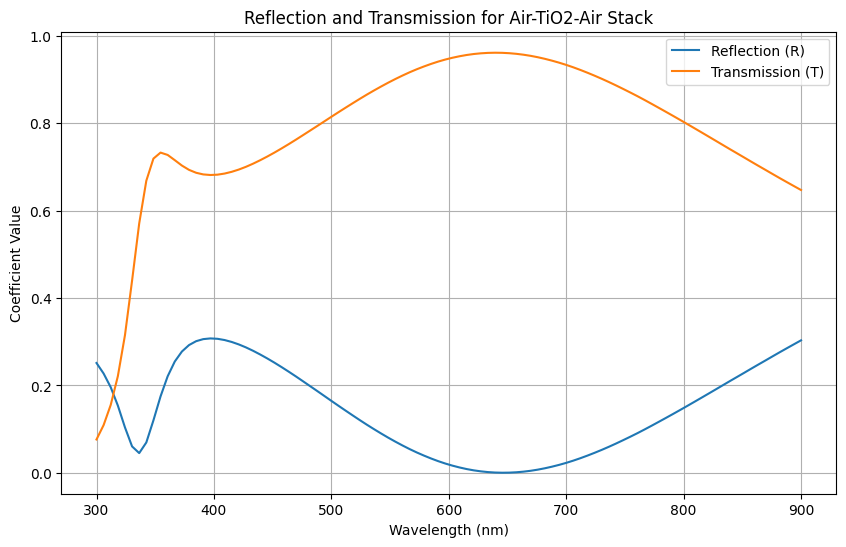

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(wavelengths * 1e9, R_avg, label='Reflection (R)')
plt.plot(wavelengths * 1e9, T_avg, label='Transmission (T)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Coefficient Value')
plt.title('Reflection and Transmission for Air-TiO2-Air Stack')
plt.legend()
plt.grid(True)
plt.show()

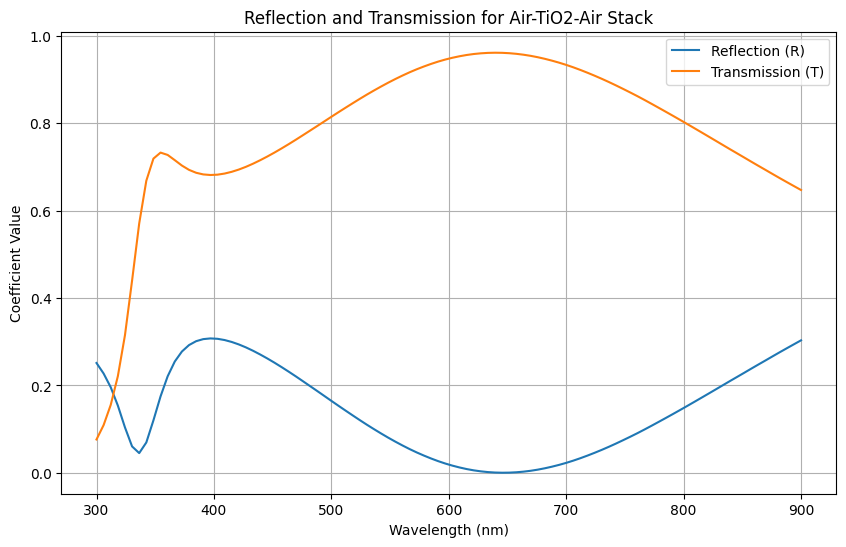

In [11]:
R_TE, T_TE, R_TM, T_TM = stackrt0(n_stack, d_stack, frequencies)

# Calculate average R and T
R_avg = (R_TE + R_TM) / 2
T_avg = (T_TE + T_TM) / 2
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(wavelengths * 1e9, R_avg, label='Reflection (R)')
plt.plot(wavelengths * 1e9, T_avg, label='Transmission (T)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Coefficient Value')
plt.title('Reflection and Transmission for Air-TiO2-Air Stack')
plt.legend()
plt.grid(True)
plt.show()